#### Import Libraries and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Portofolio/Superstore Sales/Sample - Superstore.xlsx')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


#### Data Preprocessing

In [3]:
df.shape

(9994, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [6]:
df.describe(include='object')

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [7]:
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter
df['Month'] = df['Order Date'].dt.strftime('%b')
df['Num Month'] = df['Order Date'].dt.month

df['Day'] = df['Order Date'].dt.day
df['Week'] = df['Order Date'].dt.strftime('%a')
df['Num Week'] = df['Order Date'].dt.dayofweek + 1
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Quantity,Discount,Profit,Year,Quarter,Month,Num Month,Day,Week,Num Week
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,2016,4,Nov,11,8,Tue,2
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,2016,4,Nov,11,8,Tue,2
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,2016,2,Jun,6,12,Sun,7
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,2015,4,Oct,10,11,Sun,7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,2015,4,Oct,10,11,Sun,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,3,0.20,4.1028,2014,1,Jan,1,21,Tue,2
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,2,0.00,15.6332,2017,1,Feb,2,26,Sun,7
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,2,0.20,19.3932,2017,1,Feb,2,26,Sun,7
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,4,0.00,13.3200,2017,1,Feb,2,26,Sun,7


In [8]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            6144
Quantity           14
Discount           12
Profit           7545
Year                4
Quarter             4
Month              12
Num Month          12
Day                31
Week                7
Num Week            7
dtype: int64

In [9]:
# Check the duplicate rows
df.duplicated().sum()

0

In [10]:
newdf = df.copy()

In [11]:
# Drop the following columns
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Customer Name', 'Product ID'], axis=1, inplace=True)

#### Exploratory Data Analysis

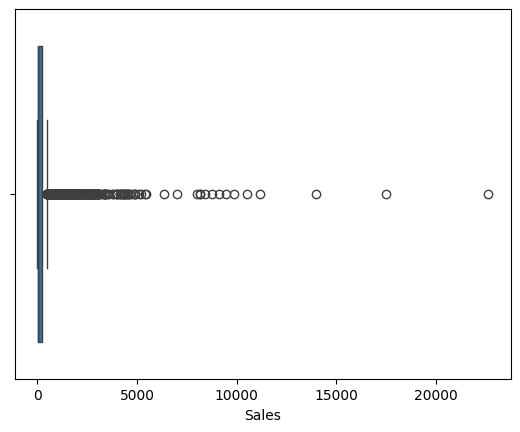

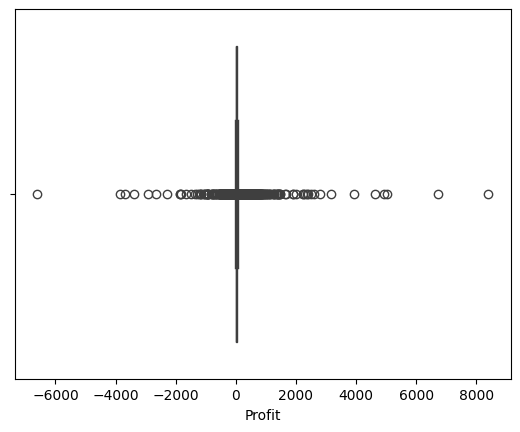

In [12]:
# Check for outliers
nums = ['Sales', 'Profit']

for num in nums:
    sns.boxplot(data=df, x=num)
    plt.show()

In [13]:
# Identify outliers in the Sales column
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
# Interquartile range
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
outliers

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,...,Quantity,Discount,Profit,Year,Quarter,Month,Num Month,Day,Week,Num Week
1,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,...,3,0.00,219.5820,2016,4,Nov,11,8,Tue,2
3,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,...,5,0.45,-383.0310,2015,4,Oct,10,11,Sun,7
7,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,...,6,0.20,90.7152,2014,2,Jun,6,9,Mon,1
10,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,...,9,0.20,85.3092,2014,2,Jun,6,9,Mon,1
11,2014-06-09,2014-06-14,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,...,4,0.20,68.3568,2014,2,Jun,6,9,Mon,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9931,2015-11-13,2015-11-17,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,...,4,0.15,-40.1960,2015,4,Nov,11,13,Fri,5
9942,2014-12-28,2015-01-03,Standard Class,Consumer,United States,Anaheim,California,92804,West,Office Supplies,...,9,0.00,29.9646,2014,4,Dec,12,28,Sun,7
9947,2017-06-01,2017-06-03,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Furniture,...,6,0.00,539.2464,2017,2,Jun,6,1,Thu,4
9948,2017-06-01,2017-06-03,Second Class,Corporate,United States,Indianapolis,Indiana,46203,Central,Office Supplies,...,8,0.00,793.7160,2017,2,Jun,6,1,Thu,4


In [14]:
high_sales = df[df['Sales'] > upper_bound]

In [15]:
low_profit = df[df['Profit'] < lower_bound]

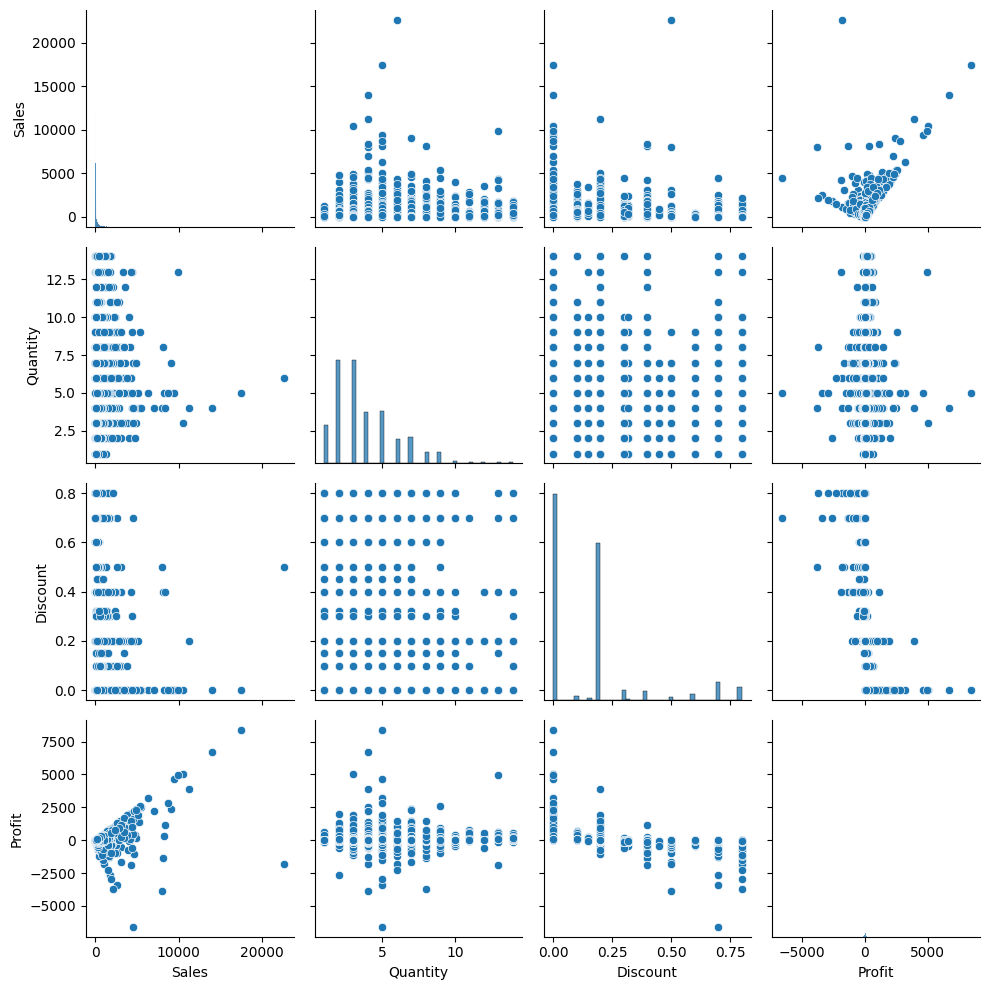

In [16]:
num_col = ['Sales', 'Quantity', 'Discount', 'Profit']
df_filtered = df[num_col]

sns.pairplot(df_filtered)
plt.tight_layout()

In [17]:
# Number of unique columns <= 4
cols = [col for col in df.columns if df[col].nunique() <= 4]
cols

['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Year', 'Quarter']

<ipython-input-18-724f33024d2f>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  fig = plt.subplot(2, 3, i)


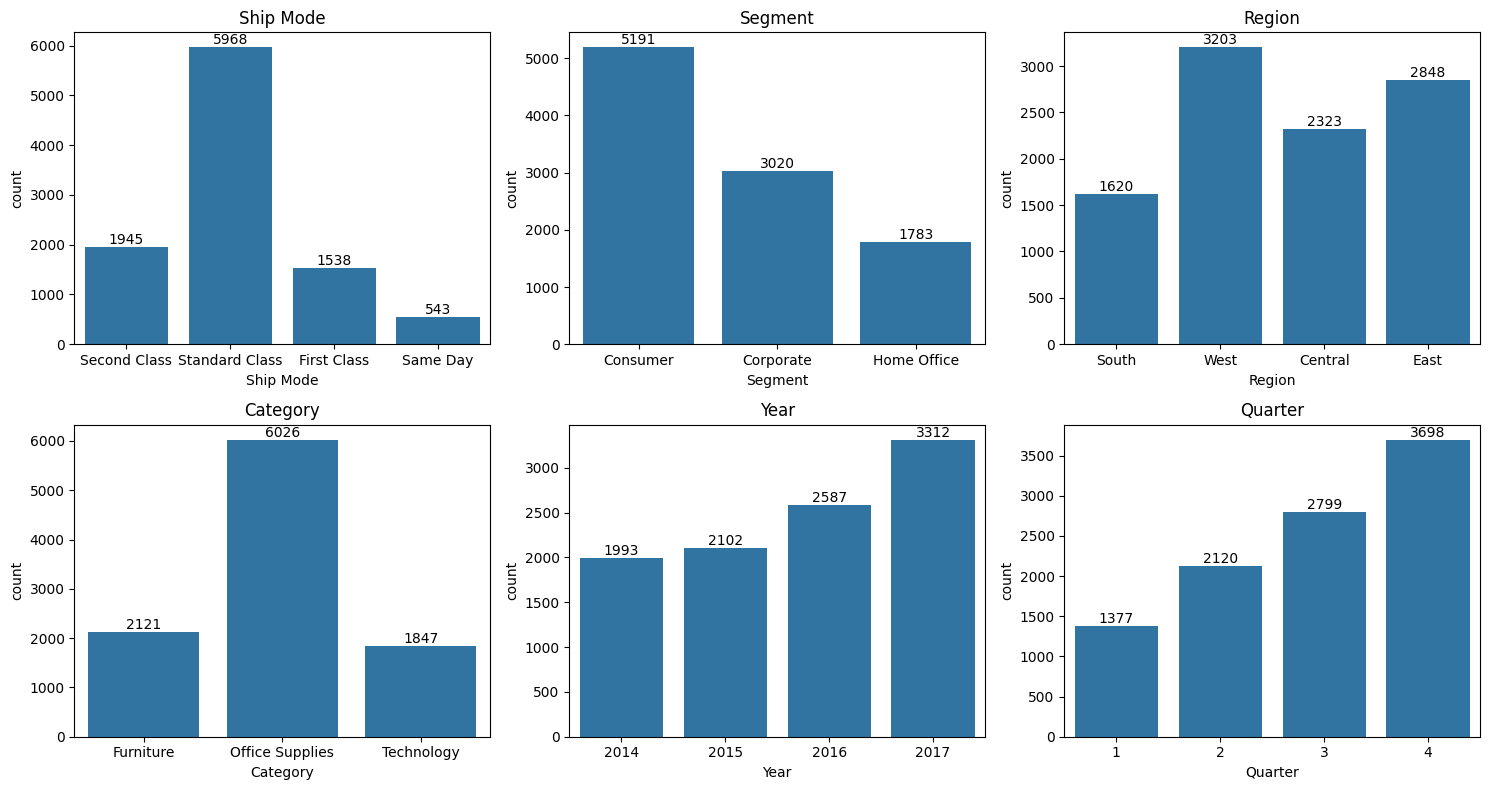

In [18]:
cols_filtered = [col for col in cols if col != 'Country']

fig, ax = plt.subplots(figsize=(15, 8))

for i, col in enumerate(cols_filtered, 1):
    fig = plt.subplot(2, 3, i)
    ax = sns.countplot(data=df, x=col)
    plt.title(col)

    # Add annotation
    for c in ax.containers:
        ax.bar_label(c, fmt='%d')

plt.tight_layout()
plt.show()

In [19]:
df = df.set_index('Order Date')

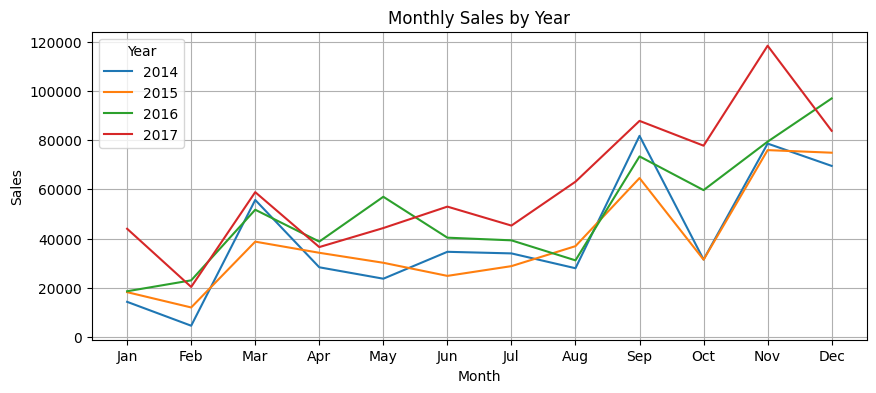

In [20]:
sales_month = (df.groupby(['Year', 'Month', 'Num Month'])['Sales'].sum().reset_index().sort_values(by=['Year', 'Num Month']))

plt.figure(figsize=(10, 4))

for year in sales_month['Year'].unique():
    data_year = sales_month[sales_month['Year'] == year]
    plt.plot(data_year['Month'], data_year['Sales'], label=year)

plt.legend(title='Year')
plt.title('Monthly Sales by Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

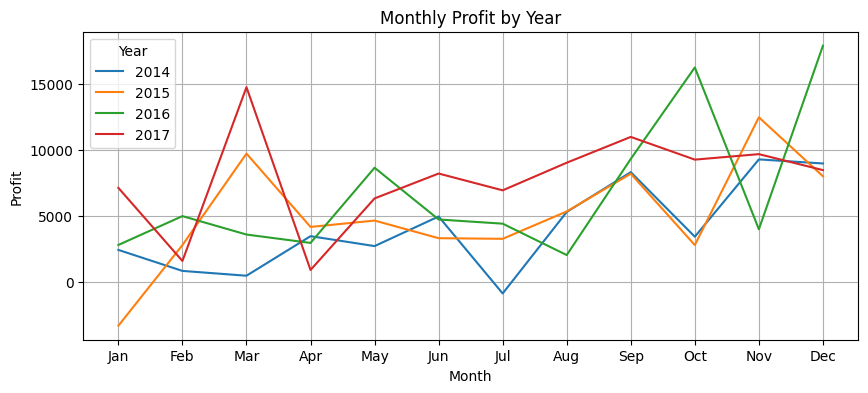

In [21]:
profit_month = (df.groupby(['Year', 'Month', 'Num Month'])['Profit'].sum().reset_index().sort_values(by=['Year', 'Num Month']))

plt.figure(figsize=(10, 4))

for year in profit_month['Year'].unique():
    data_year = profit_month[profit_month['Year'] == year]
    plt.plot(data_year['Month'], data_year['Profit'], label=year)

plt.legend(title='Year')
plt.title('Monthly Profit by Year')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

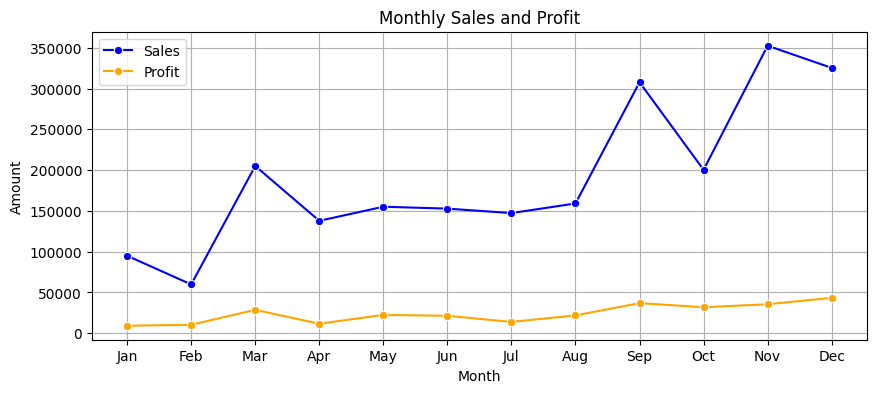

In [22]:
# Aggregate data by month and calculate total Sales and Profit
sales_profit_per_year = df.groupby(['Month', 'Num Month'])[['Sales', 'Profit']].sum().reset_index().sort_values(by=['Num Month'])

plt.figure(figsize=(10, 4))

sns.lineplot(data=sales_profit_per_year, x='Month', y='Sales', marker='o', label='Sales', color='blue')
sns.lineplot(data=sales_profit_per_year, x='Month', y='Profit', marker='o', label='Profit', color='orange')

plt.title('Monthly Sales and Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

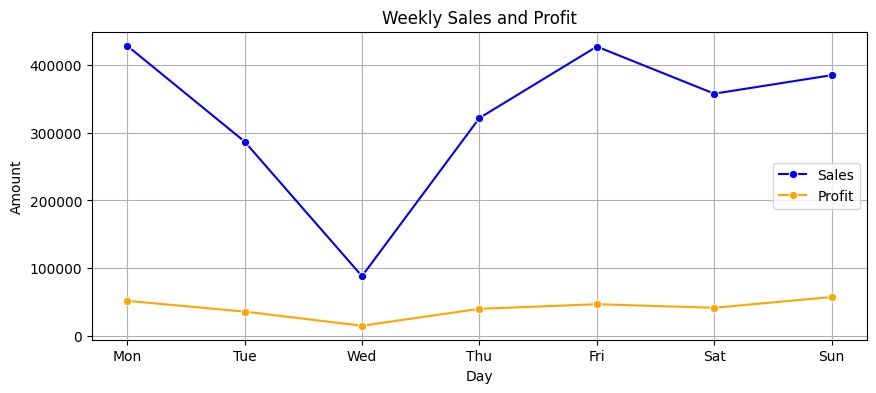

In [23]:
# Aggregate data by month and calculate total Sales and Profit
sales_profit_per_year = df.groupby(['Week', 'Num Week'])[['Sales', 'Profit']].sum().reset_index().sort_values(by=['Num Week'])

plt.figure(figsize=(10, 4))

sns.lineplot(data=sales_profit_per_year, x='Week', y='Sales', marker='o', label='Sales', color='blue')
sns.lineplot(data=sales_profit_per_year, x='Week', y='Profit', marker='o', label='Profit', color='orange')

plt.title('Weekly Sales and Profit')
plt.xlabel('Day')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [24]:
sales_month = df.groupby(['Year', 'Month', 'Num Month'])['Sales'].sum().to_frame(
                    name='Sales').reset_index().assign(Date=lambda x:
                    pd.to_datetime(dict(year=x.Year, month=x['Num Month'], day=1)))

sales_month = sales_month.sort_values(by=['Year', 'Num Month'])

sales_month.insert(0, 'Date', sales_month.pop('Date'))

In [25]:
profit_month = df.groupby(['Year', 'Month', 'Num Month'])['Profit'].sum().to_frame(
                    name='Profit').reset_index().assign(Date=lambda x:
                    pd.to_datetime(dict(year=x.Year, month=x['Num Month'], day=1)))

profit_month = profit_month.sort_values(by=['Year', 'Num Month'])

profit_month.insert(0, 'Date', profit_month.pop('Date'))

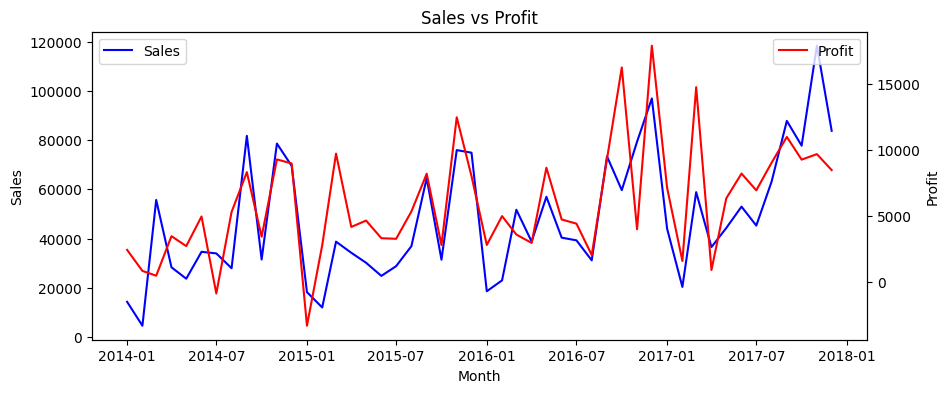

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax2 = ax1.twinx()
ax1.plot(sales_month.Date, sales_month['Sales'], color='b')
ax2.plot(profit_month.Date, profit_month['Profit'], color='r')

ax1.set_xlabel('Month')
ax1.set_ylabel('Sales')
ax2.set_ylabel('Profit')

ax1.legend(['Sales'], loc='upper left')
ax2.legend(['Profit'], loc='upper right')

plt.title('Sales vs Profit')
plt.show()

<ipython-input-27-62ba83d3b1f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Segment', y='Sales', data=segment_data, ax=ax[0], palette="deep")
<ipython-input-27-62ba83d3b1f8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Segment', y='Profit', data=segment_data, ax=ax[1], palette="flare")


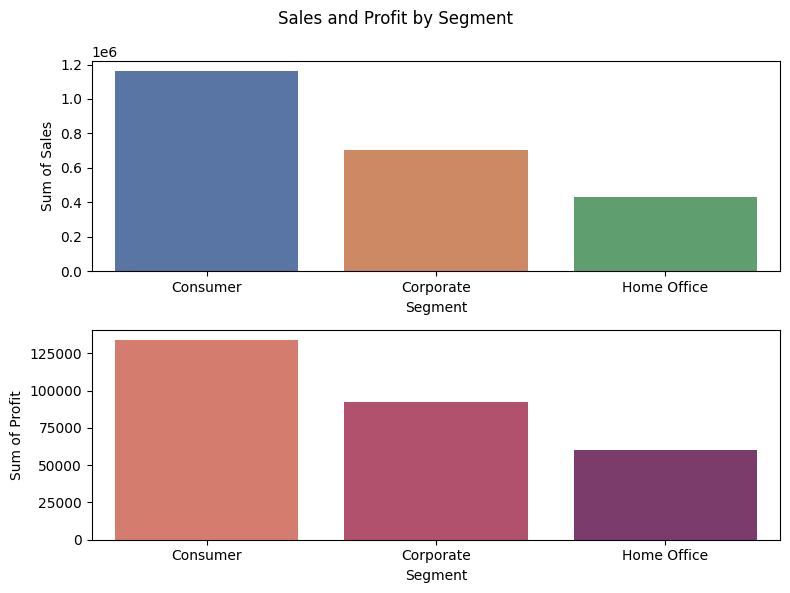

In [27]:
segment_data = df.groupby('Segment')[['Sales', 'Profit']].sum().reset_index()
fig, ax = plt.subplots(2, figsize=(8, 6))

ax1 = sns.barplot(x='Segment', y='Sales', data=segment_data, ax=ax[0], palette="deep")
ax1.set_ylabel('Sum of Sales')

ax2 = sns.barplot(x='Segment', y='Profit', data=segment_data, ax=ax[1], palette="flare")
ax2.set_ylabel('Sum of Profit')

plt.suptitle('Sales and Profit by Segment')
plt.tight_layout()
plt.show()

<ipython-input-28-27b4d8f0de65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Ship Mode', y='Sales', data=ship_mode, ax=ax[0], palette="deep")
<ipython-input-28-27b4d8f0de65>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Ship Mode', y='Profit', data=ship_mode, ax=ax[1], palette="flare")


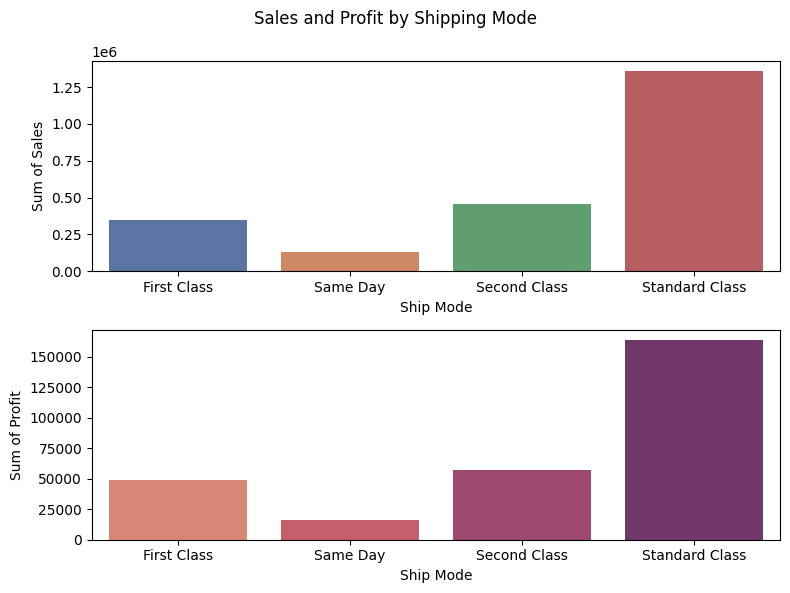

In [28]:
ship_mode = df.groupby('Ship Mode')[['Sales', 'Profit']].sum().reset_index()
fig, ax = plt.subplots(2, figsize=(8, 6))

ax1 = sns.barplot(x='Ship Mode', y='Sales', data=ship_mode, ax=ax[0], palette="deep")
ax1.set_ylabel('Sum of Sales')

ax2 = sns.barplot(x='Ship Mode', y='Profit', data=ship_mode, ax=ax[1], palette="flare")
ax2.set_ylabel('Sum of Profit')

plt.suptitle('Sales and Profit by Shipping Mode')
plt.tight_layout()
plt.show()

<ipython-input-29-cdeeedfcf59c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Category', y='Sales', data=category, ax=ax[0], palette="deep")
<ipython-input-29-cdeeedfcf59c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Category', y='Profit', data=category, ax=ax[1], palette="flare")


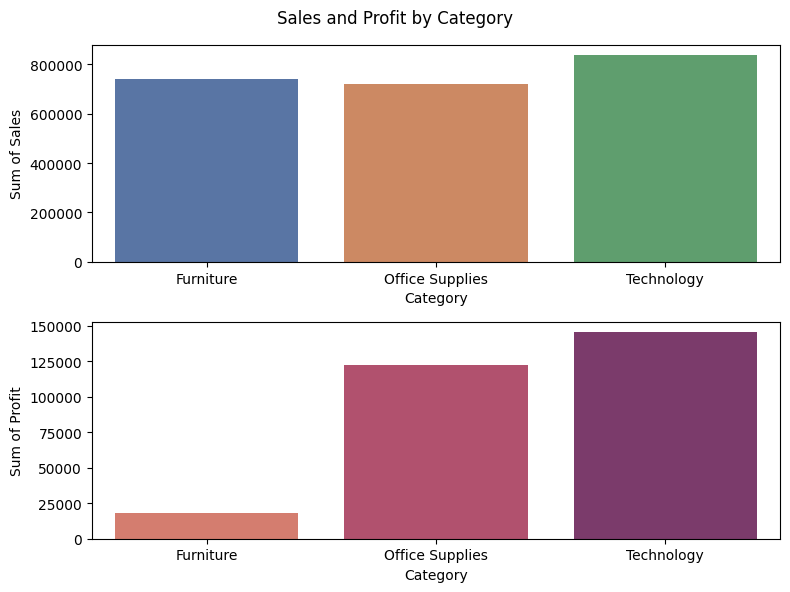

In [29]:
category = df.groupby('Category')[['Sales', 'Profit']].sum().reset_index()
fig, ax = plt.subplots(2, figsize=(8, 6))

ax1 = sns.barplot(x='Category', y='Sales', data=category, ax=ax[0], palette="deep")
ax1.set_ylabel('Sum of Sales')

ax2 = sns.barplot(x='Category', y='Profit', data=category, ax=ax[1], palette="flare")
ax2.set_ylabel('Sum of Profit')

plt.suptitle('Sales and Profit by Category')
plt.tight_layout()
plt.show()

<ipython-input-30-d9f103e4641f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x='Region', y='Sales', data=region, ax=ax[0], palette="deep")
<ipython-input-30-d9f103e4641f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Region', y='Profit', data=region, ax=ax[1], palette="flare")


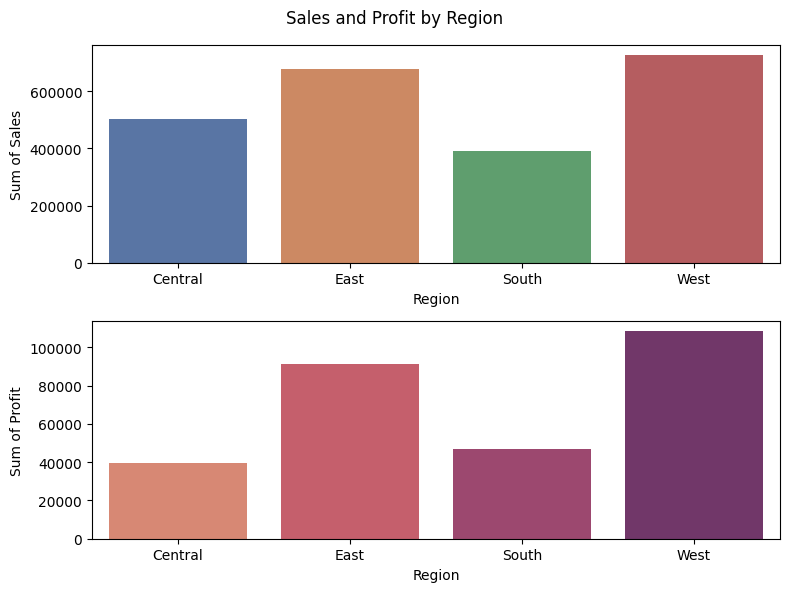

In [30]:
region = df.groupby('Region')[['Sales', 'Profit']].sum().reset_index()
fig, ax = plt.subplots(2, figsize=(8, 6))

ax1 = sns.barplot(x='Region', y='Sales', data=region, ax=ax[0], palette="deep")
ax1.set_ylabel('Sum of Sales')

ax2 = sns.barplot(x='Region', y='Profit', data=region, ax=ax[1], palette="flare")
ax2.set_ylabel('Sum of Profit')

plt.suptitle('Sales and Profit by Region')
plt.tight_layout()
plt.show()

[Text(0.5, 23.52222222222222, ''), Text(50.722222222222214, 0.5, '')]

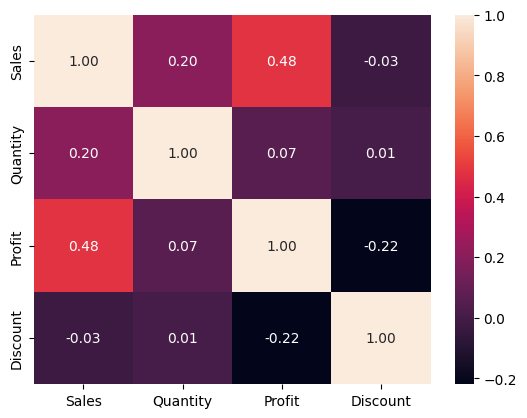

In [31]:
# Correlation between various factors
cor_df = df[['Sales', 'Quantity', 'Profit', 'Discount']]
correlation = cor_df.corr()

ax = sns.heatmap(correlation, annot=True, fmt=".2f")
ax.set(xlabel="", ylabel="")

##### High Sales Analysis

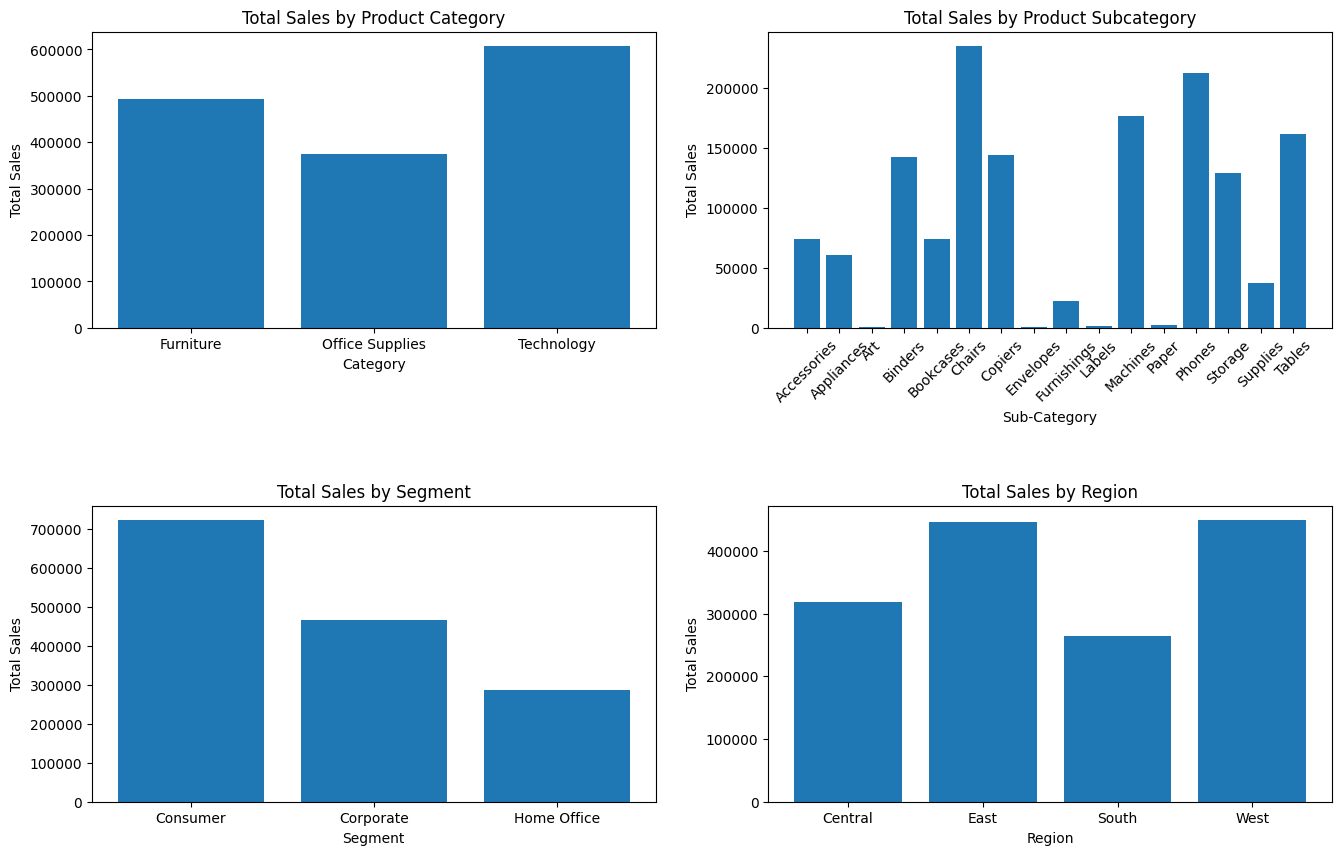

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Define data and titles for each subplot
subplots = [
    {'data': high_sales[['Category', 'Sales']].groupby('Category').sum().reset_index(), 'x': 'Category', 'title': 'Total Sales by Product Category', 'axes': axes[0, 0]},
    {'data': high_sales[['Sub-Category', 'Sales']].groupby('Sub-Category').sum().reset_index(), 'x': 'Sub-Category', 'title': 'Total Sales by Product Subcategory', 'axes': axes[0, 1], 'rotate': 45},
    {'data': high_sales[['Segment', 'Sales']].groupby('Segment').sum().reset_index(), 'x': 'Segment', 'title': 'Total Sales by Segment', 'axes': axes[1, 0]},
    {'data': high_sales[['Region', 'Sales']].groupby('Region').sum().reset_index(), 'x': 'Region', 'title': 'Total Sales by Region', 'axes': axes[1, 1]}
]

# Create subplots dynamically
for subplot in subplots:
    ax = subplot['axes']
    ax.bar(subplot['data'][subplot['x']], subplot['data']['Sales'])
    ax.set_title(subplot['title'])
    ax.set_xlabel(subplot['x'])
    ax.set_ylabel('Total Sales')
    if 'rotate' in subplot:
        ax.tick_params(axis='x', rotation=subplot['rotate'])

# Adjust spacing between subplots in vertical direction
plt.subplots_adjust(hspace=0.6)
plt.show()

##### Low Profit Analysis

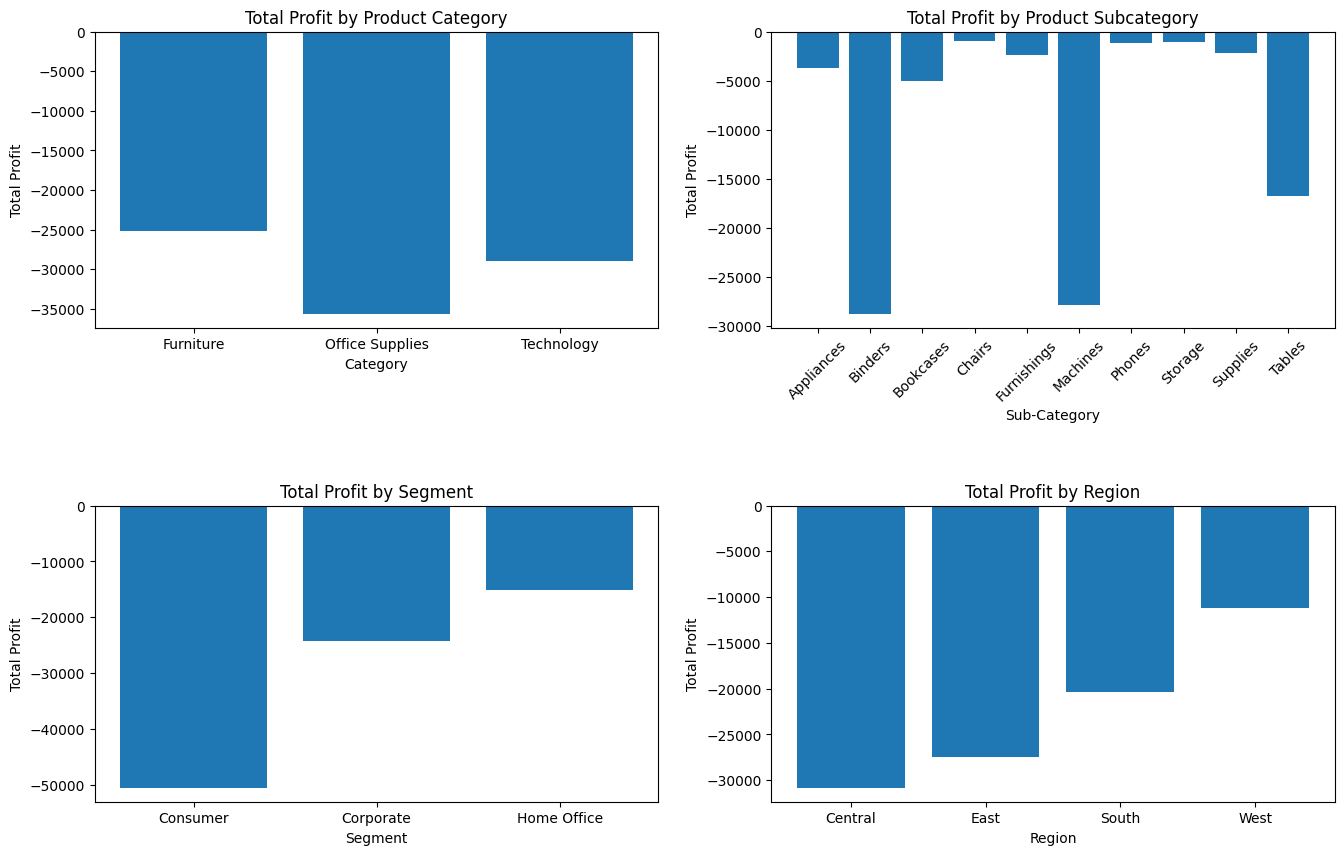

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Define data and titles for each subplot
subplots = [
    {'data': low_profit[['Category', 'Profit']].groupby('Category').sum().reset_index(), 'x': 'Category', 'title': 'Total Profit by Product Category', 'axes': axes[0, 0]},
    {'data': low_profit[['Sub-Category', 'Profit']].groupby('Sub-Category').sum().reset_index(), 'x': 'Sub-Category', 'title': 'Total Profit by Product Subcategory', 'axes': axes[0, 1], 'rotate': 45},
    {'data': low_profit[['Segment', 'Profit']].groupby('Segment').sum().reset_index(), 'x': 'Segment', 'title': 'Total Profit by Segment', 'axes': axes[1, 0]},
    {'data': low_profit[['Region', 'Profit']].groupby('Region').sum().reset_index(), 'x': 'Region', 'title': 'Total Profit by Region', 'axes': axes[1, 1]}
]

# Create subplots dynamically
for subplot in subplots:
    ax = subplot['axes']
    ax.bar(subplot['data'][subplot['x']], subplot['data']['Profit'])
    ax.set_title(subplot['title'])
    ax.set_xlabel(subplot['x'])
    ax.set_ylabel('Total Profit')
    if 'rotate' in subplot:
        ax.tick_params(axis='x', rotation=subplot['rotate'])

# Adjust spacing between subplots in vertical direction
plt.subplots_adjust(hspace=0.6)
plt.show()

#### Model Prediction and Training

In [59]:
df = df.reset_index()

df.drop(['Order Date', 'Ship Date', 'Country', 'City', 'State', 'Product Name', 'Month', 'Week'], axis=1, inplace=True)

In [60]:
de = preprocessing.LabelEncoder()

col_encode = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category']
for col in col_encode:
    df[col] = de.fit_transform(df[col])

In [61]:
feature = df.drop(columns='Sales')
target = df[['Sales']]

# Divide the data into training group and test group
feature_sales_train, feature_sales_test, target_sales_train, target_sales_test = train_test_split(feature, target, test_size=0.30, random_state=42)

In [62]:
x_sales_train = feature_sales_train.to_numpy()
y_sales_train = target_sales_train.to_numpy().ravel()

In [63]:
x_sales_test = feature_sales_test.to_numpy()
y_sales_test = target_sales_test.to_numpy().ravel()

In [64]:
# Define the model
foreg = RandomForestRegressor()
foreg.fit(x_sales_train, y_sales_train)

RandomForestRegressor()

In [65]:
# Model evaluation on training data and test data
# Create prediction vector on training data
y_predict_train = foreg.predict(x_sales_train)

r2_train_foreg = r2_score(y_sales_train, y_predict_train)
mae_train_foreg = mean_absolute_error(y_sales_train, y_predict_train)
mape_train_foreg = mean_absolute_percentage_error(y_sales_train, y_predict_train)

# Create prediction vector on test data
y_predict_test = foreg.predict(x_sales_test)

r2_test_foreg = r2_score(y_sales_test, y_predict_test)
mae_test_foreg = mean_absolute_error(y_sales_test, y_predict_test)
mape_test_foreg = mean_absolute_percentage_error(y_sales_test, y_predict_test)

print('\nMETRICS FOR TRAINING DATA')
print('R2 for training data is:', r2_train_foreg)
print('MAE for training data is:', mae_train_foreg)
print('MAPE for training data is:', mape_train_foreg)

print('\nMETRICS FOR TEST DATA')
print('R2 for test data is:', r2_test_foreg)
print('MAE for test data is:', mae_test_foreg)
print('MAPE for test data is:', mape_test_foreg)


METRICS FOR TRAINING DATA
R2 for training data is: 0.9720406695673588
MAE for training data is: 26.373369726661902
MAPE for training data is: 0.15928273412545593

METRICS FOR TEST DATA
R2 for test data is: 0.6766129971332091
MAE for test data is: 82.33550172990996
MAPE for test data is: 0.3990399783302911


In [66]:
# Define the model
linreg = LinearRegression()
linreg.fit(x_sales_train, y_sales_train)

LinearRegression()

In [67]:
# Model evaluation on training data and test data
# Create prediction vector on training data
y_predict_train = linreg.predict(x_sales_train)

r2_train_linreg = r2_score(y_sales_train, y_predict_train)
mae_train_linreg = mean_absolute_error(y_sales_train, y_predict_train)
mape_train_linreg = mean_absolute_percentage_error(y_sales_train, y_predict_train)

# Create prediction vector on test data
y_predict_test = linreg.predict(x_sales_test)

r2_test_linreg = r2_score(y_sales_test, y_predict_test)
mae_test_linreg = mean_absolute_error(y_sales_test, y_predict_test)
mape_test_linreg = mean_absolute_percentage_error(y_sales_test, y_predict_test)

print('\nMETRICS FOR TRAINING DATA')
print('R2 for training data is:', r2_train_linreg)
print('MAE for training data is:', mae_train_linreg)
print('MAPE for training data is:', mape_train_linreg)

print('\nMETRICS FOR TEST DATA')
print('R2 for test data is:', r2_test_linreg)
print('MAE for test data is:', mae_test_linreg)
print('MAPE for test data is:', mape_test_linreg)


METRICS FOR TRAINING DATA
R2 for training data is: 0.3904796904752479
MAE for training data is: 207.46841204710447
MAPE for training data is: 7.392183283456858

METRICS FOR TEST DATA
R2 for test data is: 0.10429254423061918
MAE for test data is: 236.85614860596974
MAPE for test data is: 7.062792162384616


In [68]:
# Define the model
extre = ExtraTreesRegressor()
extre.fit(x_sales_train, y_sales_train)

ExtraTreesRegressor()

In [69]:
# Model evaluation on training data and test data
# Create prediction vector on training data
y_predict_train = extre.predict(x_sales_train)

r2_train_extre = r2_score(y_sales_train, y_predict_train)
mae_train_extre = mean_absolute_error(y_sales_train, y_predict_train)
mape_train_extre = mean_absolute_percentage_error(y_sales_train, y_predict_train)

# Create prediction vector on test data
y_predict_test = extre.predict(x_sales_test)

r2_test_extre = r2_score(y_sales_test, y_predict_test)
mae_test_extre = mean_absolute_error(y_sales_test, y_predict_test)
mape_test_extre = mean_absolute_percentage_error(y_sales_test, y_predict_test)

print('\nMETRICS FOR TRAINING DATA')
print('R2 for training data is:', r2_train_extre)
print('MAE for training data is:', mae_train_extre)
print('MAPE for training data is:', mape_train_extre)

print('\nMETRICS FOR TEST DATA')
print('R2 for test data is:', r2_test_extre)
print('MAE for test data is:', mae_test_extre)
print('MAPE for test data is:', mape_test_extre)


METRICS FOR TRAINING DATA
R2 for training data is: 1.0
MAE for training data is: 2.8452310002119197e-13
MAPE for training data is: 1.2463379894992337e-15

METRICS FOR TEST DATA
R2 for test data is: 0.7028032696968939
MAE for test data is: 82.31918002167389
MAPE for test data is: 0.4531496222760035


In [70]:
# Define the model
adbos = AdaBoostRegressor()
adbos.fit(x_sales_train, y_sales_train)

AdaBoostRegressor()

In [71]:
# Model evaluation on training data and test data
# Create prediction vector on training data
y_predict_train = adbos.predict(x_sales_train)

r2_train_adbos = r2_score(y_sales_train, y_predict_train)
mae_train_adbos = mean_absolute_error(y_sales_train, y_predict_train)
mape_train_adbos = mean_absolute_percentage_error(y_sales_train, y_predict_train)

# Create prediction vector on test data
y_predict_test = adbos.predict(x_sales_test)

r2_test_adbos = r2_score(y_sales_test, y_predict_test)
mae_test_adbos = mean_absolute_error(y_sales_test, y_predict_test)
mape_test_adbos = mean_absolute_percentage_error(y_sales_test, y_predict_test)

print('\nMETRICS FOR TRAINING DATA')
print('R2 for training data is:', r2_train_adbos)
print('MAE for training data is:', mae_train_adbos)
print('MAPE for training data is:', mape_train_adbos)

print('\nMETRICS FOR TEST DATA')
print('R2 for test data is:', r2_test_adbos)
print('MAE for test data is:', mae_test_adbos)
print('MAPE for test data is:', mape_test_adbos)


METRICS FOR TRAINING DATA
R2 for training data is: -0.634552596974929
MAE for training data is: 690.3958689593322
MAPE for training data is: 38.50477675536283

METRICS FOR TEST DATA
R2 for test data is: -0.25951019213770055
MAE for test data is: 706.7870407666932
MAPE for test data is: 36.573946709012034


In [72]:
# Define the model
bagres = BaggingRegressor()
bagres.fit(x_sales_train, y_sales_train)

BaggingRegressor()

In [73]:
# Model evaluation on training data and test data
# Create prediction vector on training data
y_predict_train = bagres.predict(x_sales_train)

r2_train_bagres = r2_score(y_sales_train, y_predict_train)
mae_train_bagres = mean_absolute_error(y_sales_train, y_predict_train)
mape_train_bagres = mean_absolute_percentage_error(y_sales_train, y_predict_train)

# Create prediction vector on test data
y_predict_test = bagres.predict(x_sales_test)

r2_test_bagres = r2_score(y_sales_test, y_predict_test)
mae_test_bagres = mean_absolute_error(y_sales_test, y_predict_test)
mape_test_bagres = mean_absolute_percentage_error(y_sales_test, y_predict_test)

print('\nMETRICS FOR TRAINING DATA')
print('R2 for training data is:', r2_train_bagres)
print('MAE for training data is:', mae_train_bagres)
print('MAPE for training data is:', mape_train_bagres)

print('\nMETRICS FOR TEST DATA')
print('R2 for test data is:', r2_test_bagres)
print('MAE for test data is:', mae_test_bagres)
print('MAPE for test data is:', mape_test_bagres)


METRICS FOR TRAINING DATA
R2 for training data is: 0.9674335642417823
MAE for training data is: 28.255664533238026
MAPE for training data is: 0.1628434715011303

METRICS FOR TEST DATA
R2 for test data is: 0.6704466887541947
MAE for test data is: 86.05628850950316
MAPE for test data is: 0.40468413492992866


In [74]:
# Create a dataframe with the metrics of the tested models
models = pd.DataFrame({
     'Model': [
         'RandomForestRegressor', 'LinearRegression', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'BaggingRegressor'
     ],
     'R2 Score': [
         r2_test_foreg, r2_test_linreg, r2_test_extre, r2_test_adbos, r2_test_bagres
     ],
     'MAE': [
         mae_test_foreg, mae_test_linreg, mae_test_extre, mae_test_adbos, mae_test_bagres
     ],
     'MAPE': [
         mape_test_foreg, mape_test_linreg, mape_test_extre, mape_test_adbos, mape_test_bagres
     ]
})

In [75]:
models = models.sort_values(by='R2 Score', ascending=False)
models

,Model,R2 Score,MAE,MAPE
2,ExtraTreesRegressor,0.702803,82.319180,0.453150
0,RandomForestRegressor,0.676613,82.335502,0.399040
4,BaggingRegressor,0.670447,86.056289,0.404684
1,LinearRegression,0.104293,236.856149,7.062792
3,AdaBoostRegressor,-0.259510,706.787041,36.573947
